In [1]:
# In this lab, your task is to show the relationship between the fare paid and survival from the ship’s sinking.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read the data. 
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [4]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


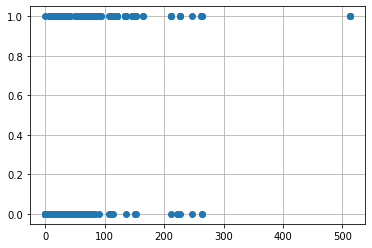

In [5]:
# Scatter plot
plt.plot(df['Fare'], df['Survived'], 'o')
plt.grid(True)

In [6]:
# Check the statistics for survived and non-survived. 
df.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,545.0,22.208584,31.484153,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


In [7]:
# Get the DataFrame of fare paid for survived passengers. 
data_survived_fare = df[df['Survived'] == 1]['Fare']
data_survived_fare

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
871     7.2250
875    83.1583
876    26.0000
883    30.0000
885    30.0000
Name: Fare, Length: 342, dtype: float64

(array([233.,  70.,  23.,   2.,   7.,   4.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

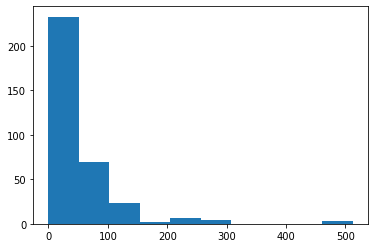

In [8]:
# Histogram
plt.hist(data_survived_fare)

(array([417.,  83.,  25.,   6.,   4.,   4.,   0.,   0.,   3.,   3.]),
 array([  0. ,  26.3,  52.6,  78.9, 105.2, 131.5, 157.8, 184.1, 210.4,
        236.7, 263. ]),
 <a list of 10 Patch objects>)

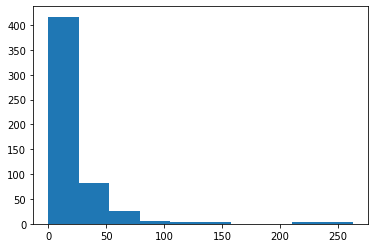

In [9]:
# Get the DataFrame of fare paid for non-survived passengers. 
data_nonsurvived_fare = df[df['Survived'] == 0]['Fare']
data_nonsurvived_fare
plt.hist(data_nonsurvived_fare)

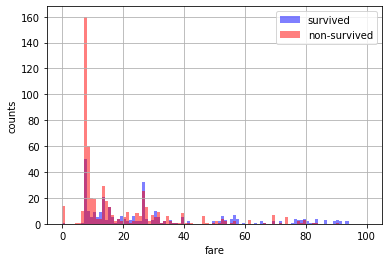

In [10]:
# Compare the two histograms. 
plt.hist(data_survived_fare, bins=100, range=(0, 100), alpha=0.5, color='blue')
plt.hist(data_nonsurvived_fare, bins=100, range=(0, 100), alpha=0.5, color='red')
plt.xlabel('fare')
plt.ylabel('counts')
plt.legend(['survived','non-survived'])
plt.grid(True)

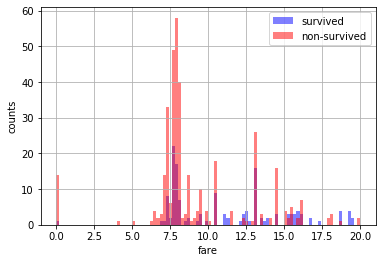

In [11]:
# Change the range to take a closer look at the difference. 
plt.hist(data_survived_fare, bins=100, range=(0, 20), alpha=0.5, color='blue')
plt.hist(data_nonsurvived_fare, bins=100, range=(0, 20), alpha=0.5, color='red')
plt.xlabel('fare')
plt.ylabel('counts')
plt.legend(['survived','non-survived'])
plt.grid(True)

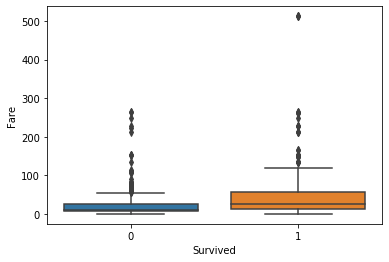

In [12]:
# Boxplot
import seaborn as sns
sns.boxplot(x='Survived', y='Fare', data=df)

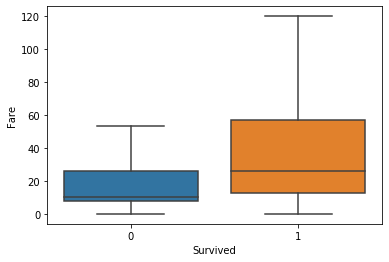

In [13]:
# Not display outliers in the boxplot
sns.boxplot(x='Survived', y='Fare', data=df, sym='')

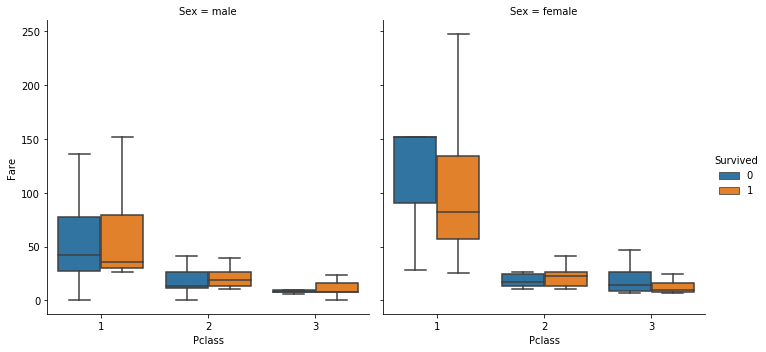

In [14]:
# Just exploring another way to show boxplots. 
sns.catplot(data=df, kind='box', x='Pclass', y='Fare', hue='Survived', col='Sex', sym='')

In [15]:
# Difference in survival rates based on fare paid


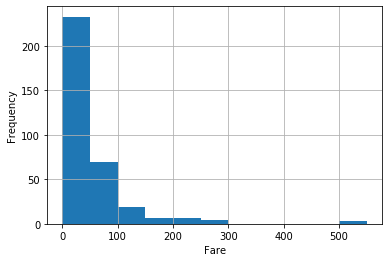

In [16]:
# Set bins. 
edges = range(0,600,50)

# Explore the data again. 
ret = plt.hist(data_survived_fare, bins=edges)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)

In [17]:
ret

(array([233.,  70.,  19.,   6.,   7.,   4.,   0.,   0.,   0.,   0.,   3.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550]),
 <a list of 11 Patch objects>)

In [18]:
# Get the bins of fare paid. 
fare_bins = ret[1]
fare_bins

array([  0,  50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])

In [19]:
fare_cut_data = pd.cut(df.Fare, fare_bins)
print(type(fare_cut_data))
fare_cut_data

<class 'pandas.core.series.Series'>


0        (0, 50]
1      (50, 100]
2        (0, 50]
3      (50, 100]
4        (0, 50]
         ...    
882      (0, 50]
883      (0, 50]
884      (0, 50]
885      (0, 50]
886      (0, 50]
Name: Fare, Length: 887, dtype: category
Categories (11, interval[int64]): [(0, 50] < (50, 100] < (100, 150] < (150, 200] ... (350, 400] < (400, 450] < (450, 500] < (500, 550]]

In [20]:
# Check the counts of passengers for each fare range. 
counts_s = pd.value_counts(fare_cut_data)
print(type(counts_s))
counts_s

<class 'pandas.core.series.Series'>


(0, 50]       712
(50, 100]     107
(100, 150]     24
(200, 250]     11
(150, 200]      9
(250, 300]      6
(500, 550]      3
(450, 500]      0
(400, 450]      0
(350, 400]      0
(300, 350]      0
Name: Fare, dtype: int64

In [21]:
# Add 'fare_range' column, which has 'fare_cut_data' converted to string. 
df['fare_range'] = fare_cut_data.map(lambda x: str(x))
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,fare_range
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,"(0, 50]"
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,"(50, 100]"
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,"(0, 50]"
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,"(50, 100]"
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,"(0, 50]"
...,...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000,"(0, 50]"
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000,"(0, 50]"
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500,"(0, 50]"
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000,"(0, 50]"


In [22]:
# Get the count of survived and non-survived for each fare range. 
df.groupby(['fare_range','Survived']).size()

fare_range  Survived
(0, 50]     0           480
            1           232
(50, 100]   0            37
            1            70
(100, 150]  0             5
            1            19
(150, 200]  0             3
            1             6
(200, 250]  0             4
            1             7
(250, 300]  0             2
            1             4
(500, 550]  1             3
dtype: int64

In [23]:
# Convert it to DataFrame so that it is easier to handle. 
survival_data_based_on_fare = df.groupby(['fare_range','Survived']).size().unstack()
survival_data_based_on_fare

Survived,0,1
fare_range,,
"(0, 50]",480.0,232.0
"(50, 100]",37.0,70.0
"(100, 150]",5.0,19.0
"(150, 200]",3.0,6.0
"(200, 250]",4.0,7.0
"(250, 300]",2.0,4.0
"(500, 550]",NaN,3.0


In [24]:
# Fill the missing value by 0. 
survival_data_based_on_fare = survival_data_based_on_fare.fillna(0)
survival_data_based_on_fare

Survived,0,1
fare_range,,
"(0, 50]",480.0,232.0
"(50, 100]",37.0,70.0
"(100, 150]",5.0,19.0
"(150, 200]",3.0,6.0
"(200, 250]",4.0,7.0
"(250, 300]",2.0,4.0
"(500, 550]",0.0,3.0


In [25]:
survival_data_based_on_fare.index

CategoricalIndex(['(0, 50]', '(50, 100]', '(100, 150]', '(150, 200]',
                  '(200, 250]', '(250, 300]', '(500, 550]'],
                 categories=['(0, 50]', '(50, 100]', '(100, 150]', '(150, 200]', '(200, 250]', '(250, 300]', '(300, 350]', '(350, 400]', ...], ordered=True, name='fare_range', dtype='category')

In [26]:
survival_data_based_on_fare.columns

Int64Index([0, 1], dtype='int64', name='Survived')

In [27]:
num_non_survived = survival_data_based_on_fare[0]

In [28]:
num_survived = survival_data_based_on_fare[1]
num_survived

fare_range
(0, 50]       232.0
(50, 100]      70.0
(100, 150]     19.0
(150, 200]      6.0
(200, 250]      7.0
(250, 300]      4.0
(500, 550]      3.0
Name: 1, dtype: float64

In [29]:
# Calculate survival rate for each fare range. 
survival_data_based_on_fare['Survival Rate (%)'] = 100 * num_survived / (num_survived + num_non_survived)
survival_data_based_on_fare

Survived,0,1,Survival Rate (%)
fare_range,,,
"(0, 50]",480.0,232.0,32.584270
"(50, 100]",37.0,70.0,65.420561
"(100, 150]",5.0,19.0,79.166667
"(150, 200]",3.0,6.0,66.666667
"(200, 250]",4.0,7.0,63.636364
"(250, 300]",2.0,4.0,66.666667
"(500, 550]",0.0,3.0,100.000000


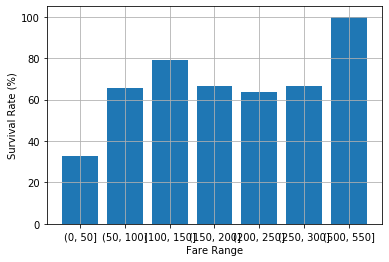

In [30]:
# Draw bar graph. 
plt.bar(survival_data_based_on_fare.index, survival_data_based_on_fare['Survival Rate (%)'])
plt.xlabel('Fare Range')
plt.ylabel('Survival Rate (%)')
plt.grid(True)

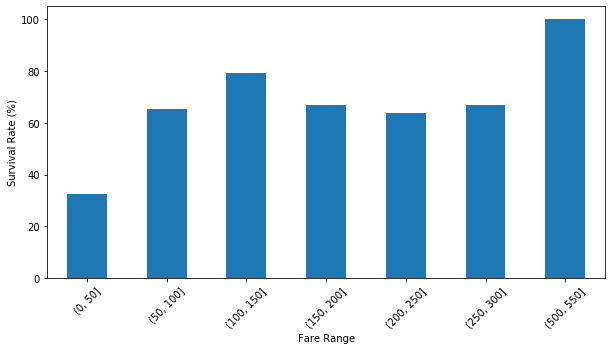

In [31]:
# Another way to show bar graph
survival_data_based_on_fare2 = survival_data_based_on_fare['Survival Rate (%)']

fig, ax = plt.subplots(figsize=(10, 5))
survival_data_based_on_fare2.plot.bar(  
    ax=ax,
    rot=45,  # xticks angle
)
#ax.set_title('title')
ax.set_xlabel('Fare Range') 
ax.set_ylabel('Survival Rate (%)')
plt.show()

- It looks that the survival rate increases as the fare paid increases. 